In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\YaqoobDavid\OneDrive - WOW Tech Europe GmbH\Desktop\PCA-Implementation-on-Fashion-MNIST-Dataset\fashion-mnist_train.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train.shape

(48000, 784)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [8]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8529166666666667

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=None)

In [14]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
pca.explained_variance_[0:5]

array([172.93401216, 112.65729229,  42.8936427 ,  40.07312521,
        31.9361486 ])

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2205745 , 0.36426703, 0.41897717, 0.47008979, 0.51082382,
       0.54110645, 0.56861447, 0.59181223, 0.60877044, 0.62194496,
       0.63354076, 0.64319744, 0.65216191, 0.66075821, 0.66814352,
       0.67543494, 0.68200787, 0.68831721, 0.69455235, 0.70037336,
       0.7055195 , 0.71056779, 0.71529418, 0.71982537, 0.72420244,
       0.72836719, 0.73233346, 0.73622341, 0.73998617, 0.74371489,
       0.74736747, 0.75089274, 0.75424934, 0.75754658, 0.7607825 ,
       0.76395259, 0.76700933, 0.76995575, 0.77279937, 0.77558856,
       0.77831118, 0.78099436, 0.78357039, 0.78613664, 0.78860853,
       0.79101769, 0.7933943 , 0.79566663, 0.79790637, 0.80003967,
       0.80215912, 0.80424644, 0.80627651, 0.80828476, 0.81027578,
       0.81222127, 0.8141365 , 0.81599884, 0.81782396, 0.81960204,
       0.82134931, 0.82307584, 0.82477736, 0.82644647, 0.82806229,
       0.8296345 , 0.83118229, 0.83268696, 0.8341817 , 0.83565613,
       0.83709885, 0.83852708, 0.83995029, 0.84136789, 0.84273

In [17]:
40.7166363/pca.explained_variance_.sum()

0.05193340310809187

In [18]:
clf.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [19]:
y_pred = clf.predict(X_test_pca)

In [20]:
accuracy_score(y_test,y_pred)

0.8579166666666667

In [21]:
# from sklearn.neighbors import KNeighborsClassifier
# for i in range(1,784):
#     pca = PCA(n_components=i)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
#     clf = KNeighborsClassifier(n_neighbors=5)
#     clf.fit(X_train_pca,y_train)
#     y_pred = clf.predict(X_test_pca)
#     print(accuracy_score(y_test,y_pred))

In [22]:
X_train_pca.shape

(48000, 784)

In [23]:
X_train_pca[:,0:2]

array([[-14.08609138,  10.3548959 ],
       [ 14.95107421,  -5.73366088],
       [ -9.6679155 , -13.20578012],
       ...,
       [ 10.33454331,  10.97386496],
       [  6.86957384,  -9.96108491],
       [  1.80823932,  -8.05813067]])

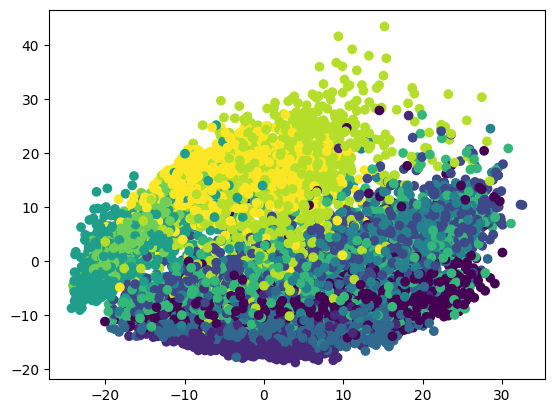

In [24]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test,cmap='viridis')

In [25]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [26]:
import matplotlib.pyplot as plt

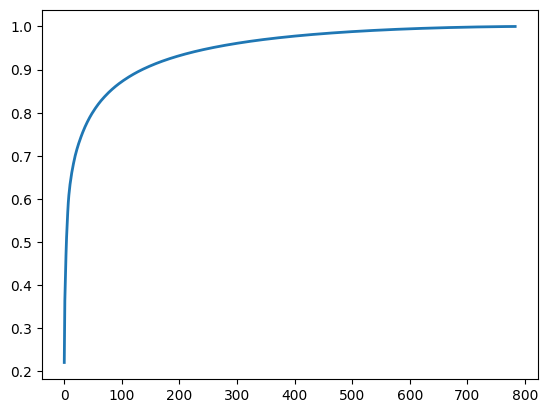

In [27]:
plt.plot(cum_var_explained,linewidth=2)

In [28]:
pca.explained_variance_[0:5]/np.sum(pca.explained_variance_)

array([0.2205745 , 0.14369253, 0.05471014, 0.05111262, 0.04073403])

In [29]:
pca.explained_variance_ratio_[0:5]

array([0.2205745 , 0.14369253, 0.05471014, 0.05111262, 0.04073403])